# Face Detection

Reference: https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/

When using OpenCV’s deep neural network module with Caffe models, you’ll need two sets of files:

- The `.prototxt` file(s) which define the model architecture (i.e., the layers themselves)
- The `.caffemodel` file which contains the weights for the actual layers

Both files are required when using models trained using Caffe for deep learning.

### How does the OpenCV deep learning face detector work?

OpenCV’s deep learning face detector is based on the Single Shot Detector (SSD) framework with a ResNet base network (unlike other OpenCV SSDs that you may have seen which typically use MobileNet as the base network).


## Face detection in images with OpenCV and deep learning
In this first example we’ll learn how to apply face detection with OpenCV to single input images.


In [1]:
%cd ../face-detection

In [2]:
import numpy as np
import argparse
import cv2
import os

We load our model using our prototxt  and model  file paths. We store the model as net

In [3]:
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt","res10_300x300_ssd_iter_140000.caffemodel" )

[INFO] loading model...


In [4]:
image = cv2.imread('test3.jpg')
original = image
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
                                        (300, 300), (104.0, 177.0, 123.0))

In [5]:
blob.shape

(1, 3, 300, 300)

The `dnn.blobFromImage`  takes care of pre-processing which includes setting the blob  dimensions and normalization

Next, we’ll apply face detection:

In [6]:
print("[INFO] computing object detections...")

[INFO] computing object detections...


In [7]:
#we pass the blob  through the net
net.setInput(blob)
detections = net.forward()

In [8]:
detections

array([[[[0.        , 1.        , 0.9325723 , ..., 0.20738813,
          0.6107827 , 0.3204091 ],
         [0.        , 1.        , 0.8747223 , ..., 0.3142037 ,
          0.3036561 , 0.44921163],
         [0.        , 1.        , 0.61666447, ..., 0.371753  ,
          0.74853927, 0.45785138],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [9]:
box_coordinates = []
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > 0.5:
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0,0,i, 3:7]*np.array([w,h,w,h])
        (startX, startY, endX, endY) = box.astype("int")
        box_coordinates.append((startX, startY, endX, endY))
        
        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 100
        cv2.rectangle(image, (startX, startY), (endX, endY),
                      (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

In [10]:
(startX, startY, endX, endY)

(354, 126, 383, 156)

In [11]:
import matplotlib.pyplot as plt

In [12]:
original = cv2.imread('test3.jpg')

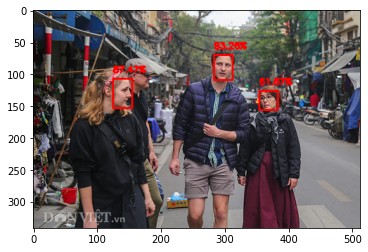

In [13]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
def show_img(item):
    img_crop = original[item[1]:item[3], item[0]:item[2]]
    img_crop = cv2.resize(img_crop, (150,150))
    plt.imshow(cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB))
    plt.show()

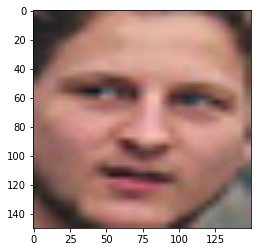

In [15]:
show_img(box_coordinates[0])